In [1]:
'''
Drive Link
https://drive.google.com/drive/folders/1I2gQXONZi587voEqRtrxk5FTHAW1oFrA
'''

'\nDrive Link\nhttps://drive.google.com/drive/folders/1I2gQXONZi587voEqRtrxk5FTHAW1oFrA\n'

In [2]:
%pwd

'C:\\python\\99z'

In [3]:
%cd C:/python

C:\python


In [4]:
#현재 위치 중인 폴더에 들어있는 파일 목록
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D42D-DE20

 C:\python 디렉터리

2023-03-17  오후 07:44    <DIR>          .
2023-03-17  오후 07:44    <DIR>          ..
2023-03-16  오후 05:33               113 .gitignore
2023-03-17  오후 06:24    <DIR>          .ipynb_checkpoints
2023-03-17  오후 07:35    <DIR>          99z
2023-03-17  오후 02:34           409,650 Data_Visualize(2).ipynb
2023-03-14  오후 05:06         7,252,289 Data_Visualize.ipynb
2023-03-03  오전 09:25             9,356 dataCrawling.ipynb
2023-03-16  오후 05:08    <DIR>          datas
2023-03-16  오후 05:08           462,165 folium.ipynb
2023-03-15  오후 03:24    <DIR>          fonts
2023-02-16  오후 05:47             2,902 hongongPython.ipynb
2023-03-03  오전 09:25            44,781 jsonURL.ipynb
2023-03-06  오전 10:02            30,808 NumPy.ipynb
2023-03-14  오후 05:06           574,229 Pandas.ipynb
2023-02-23  오후 05:48             2,817 pyMySQL.ipynb
2023-02-27  오전 11:49             2,785 selfReview.ipynb
2023-02-27  오후 12:23           136,481 Test01.ipynb
2023

In [5]:
import numpy as np
import pandas as pd

import json
import os
import sys
import urllib.request

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [6]:
#! pip3 install numpyencoder 

In [7]:
%matplotlib inline

In [8]:
#font

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.grid'] = False

prop = fm.FontProperties(fname='C://python//fonts')
font_dir = ['./fonts']

plt.rcParams['font.family'] = prop.get_family()
for font in fm.findSystemFonts(fontpaths=font_dir):
    print(fm.FontProperties(fname=font).get_name())
    fm.fontManager.addfont(font)

mpl.rcParams['font.family'] = 'D2Coding'
print(mpl.rcParams['font.family'])

NeoDunggeunmo Pro
MS Gothic
D2Coding
D2Coding
HYSinMyeongJo-Medium
D2Coding
['D2Coding']


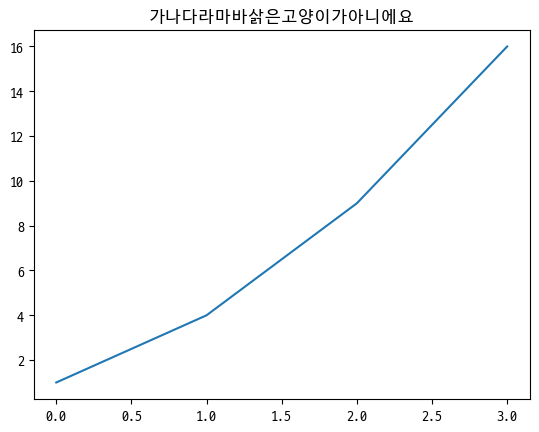

In [28]:
#테스트

plt.title('가나다라마바삵은고양이가아니에요')
plt.plot([1, 4, 9, 16])
plt.show()

In [29]:
##### 문화누리카드 오프라인 가맹점 Data

offline = pd.read_csv("99z/datas/culture_nuri_card_offline_shop.csv", encoding = "cp949")  # raw data
offline

,지역,가맹점명,분류,주소
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가)
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)
3,전북,홍지서림 전주점,도서,전라북도 전주시 완산구 동문길 106 홍지서림
4,전북,포토젠(사진관),미술,전북 전주시 완산구 전주객사4길 24-17
...,...,...,...,...
23479,전북,SM스포츠,체육용품,전북 전주시 완산구 거아평로 145
23480,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"
23481,경기,포토엔젤,미술,경기 성남시 수정구 탄리로 120번길 1
23482,서울,동서울터미널,교통수단,서울 광진구 강변역로 50


In [30]:
offline.isna().sum()  # 결측값 확인 -> 없음

지역      0
가맹점명    0
분류      0
주소      0
dtype: int64

In [31]:
ser_re_off = offline.지역.value_counts()  # 지역별 가맹점 수
ser_re_off

경기     4256
서울     3279
강원     1715
경북     1677
전북     1493
경남     1471
부산     1371
전남     1323
충남     1130
충북      948
광주      937
인천      914
대구      874
대전      751
제주      736
울산      470
세종      139
Name: 지역, dtype: int64

In [32]:
offline.지역.value_counts().sum()  # 총 데이터 수

23484

In [33]:
offline.지역.unique()  # 지역 이름에 공백 존재

array(['전북 ', '제주 ', '전남 ', '부산 ', '충남 ', '광주 ', '대전 ', '대구 ', '충북 ',
       '울산 ', '경기 ', '서울 ', '인천 ', '경북 ', '강원 ', '세종 ', '경남 '],
      dtype=object)

In [34]:
### 공백 제거 (최초 1번만 실행해야 함!!!) ###
#offline.지역 = offline.지역.str[:2]
#offline.지역.unique()

In [40]:
### 전국

result= []
for cat in offline["지역"].unique():
    data = offline[offline["지역"] == cat]["분류"].value_counts(True).to_frame() *100
    data["지역"] = cat
    result.append(data)

In [39]:
### 서울 / 경기 필터링한 Data frame

offline_reg = offline[offline['지역'].isin(["서울", "경기"])]
offline_reg

,지역,가맹점명,분류,주소


In [37]:
offline_reg.지역.value_counts()

Series([], Name: 지역, dtype: int64)

In [38]:
ser_cat_off = offline_reg.분류.value_counts()  # 서울/경기 지역 분류별 가맹점 수 (Series)
ser_cat_off

Series([], Name: 분류, dtype: int64)

In [27]:
plt.rc('font', family='D2Coding') 
plt.figure(figsize = (6, 6))
sns.barplot(x = ser_cat_off, y = ser_cat_off.index)
plt.title("서울/경기 Offline 가맹점 수")
plt.xlabel(None)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 600x600 with 0 Axes>

In [41]:
from numpyencoder import NumpyEncoder

In [75]:
#NAVER 데이터랩(검색어트렌드) - 통합검색어 트렌드 조회
#주현^^

class naverDataLabOpenAPI():
    '''
    네이버 데이터랩 오픈 API 컨트롤러 클래스
    '''
    
    def __init__(self, client_id, client_secret):
        '''
        인증키 설정 및 검색어 그룹 초기화
        '''
        self.client_id = client_id
        self.client_secret = client_secret
        self.keywordGroups = []
        self.url = url
        
    def add_keyword_groups(self, group_dict):
        '''
        검색어  그룹 추가
        self.keywordGroups 라는 빈 리스트가 생긴 상태
        검색어 그룹을 미리 Dictionary 객체에 정의한 후
        아래 메서드(def)를 통해 self.keywordGroups 리스트에 추가한다.
        '''
        keyword_group = {
            'groupName' : group_dict['groupName'],
            'keywords': group_dict['keywords']
        }
        
        self.keywordGroups.append(keyword_group)
        print(f'>>> Num of KeywordGroups: {len(self.keywordGroups)}')
        
    def get_data(self, startDate, endDate, timeUnit, device, ages, gender):
        '''
        데이터 요청 기능
        요청 파라미터 설정 후 아래 메서드에 입력하면
        DataFrame 형태로 데이터 불러올 수 있다.
        '''        
        
        #Request body
        body = json.dumps({
            'startDate': startDate,
            'endDate': endDate,
            'timeUnit': timeUnit,
            'keywordGroups': self.keywordGroups,
            'device': device,
            'ages': ages,
            'gender': gender
        }, ensure_ascii=False, cls= NumpyEncoder)
        
        #Results
        request = urllib.request.Request(self.url)
        request.add_header('X-Naver-Client-Id', client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)    
        request.add_header("Content-Type","application/json")
        response = urllib.request.urlopen(request, data=body.encode("utf-8"))
        rescode = response.getcode()
        if(rescode==200):
            #Json result
            response_text = response.read()
            try:
                result = json.loads(response_text)
            except:
                print(response_text)
            
            df = pd.DataFrame(result['results'][0]['data'])[['period']]
            for i in range(len(self.keywordGroups)):
                tmp = pd.DataFrame(result['results'][i]['data'])
                tmp = tmp.rename(columns = {'ratio': result['results'][i]['title']})
                df = pd.merge(df, tmp, how='left', on=['period'])
            self.df = df.rename(columns={'period': '날짜'})
            self.df['날짜'] = pd.to_datetime(self.df['날짜'])
        else:
            print("Error Code:" + rescode)
        return self.df
    
    def plot_monthly_trend(self):
        '''
        월 별 검색어 트렌드 그래프 출력
        '''
        df = self.df.copy()
        df_0 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(0).reset_index().rename(columns={'날짜':'월'})
        df_1 = df.groupby(by=[df['날짜'].dt.year, df['날짜'].dt.month]).mean().droplevel(1).reset_index().rename(columns={'날짜':'년도'})
        
        df = pd.merge(df_1[['년도']], df_0, how='left', left_index=True, right_index=True)
        df['날짜'] = pd.to_datetime(df[['년도','월']].assign(일=1).rename(columns={'년도':'year','월':'month','일':'day'}))
        
        colList = df.columns.drop(['날짜', '년도', '월'])
        n_col = len(colList)
        
        fig = plt.figure(figsize=(12,6))
        plt.title('월 별 검색어 트렌드', size=20, weight='bold')
        for i in range(n_col):
            sns.lineplot(x=df['날짜'], y=df[colList[i]], label=colList[i])
        plt.legend(loc='upper right')
        plt.ylabel('%')
        
        return fig

In [43]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [44]:
#API 인증 정보 설정
client_id = "QLTrFRPqtguWpbahbauE"
client_secret = "jRVI1MzywQ"
url = "https://openapi.naver.com/v1/datalab/search"

In [45]:
#요청 파라미터 설정
#수정 가능합니다!
'''
startDate : str :조회 기간 시작 날짜 (yyyy-mm-dd 형식, 2016-01-01부터 가능)
endDate : str : 조회 기간 종료 날짜 (yyyy-mm-dd 형식)
timeUnit : str :구간 단위, date(일간)/week(주간)/month(월간)
device : str : 검색 환경 조건, 설정안함(모든환경)/pc(PC검색추이),mo(모바일검색추이)
ages : list : 검색 사용자의 연령, 설정안함(모든 연령), [1:11] 이런 식인 듯
    1: 0∼12세 / 2: 13∼18세 /3: 19∼24세 /4: 25∼29세/5: 30∼34세/6: 35∼39세
    7: 40∼44세/8: 45∼49세/9: 50∼54세/10: 55∼59세/11: 60세 이상
gender : 검색 사용자의 성별, 설정안함(모든 성별), m:남성, f:여성
'''
startDate = '2016-01-01'
endDate = '2023-03-17'
timeUnit = 'date'
device = ''
ages = []
gender = ''

In [46]:
'''
데이터 불러오기
검색어 그룹 세트 정의
여기를 수정하면 됩니다!!
'''

keyword_group_set = {
    'keyword_group_1': {'groupName': "공연", 'keywords': ['공연','뮤지컬','연극']},
    'keyword_group_2': {'groupName': "예술의전당", 'keywords': ["지니","Genie",'지니뮤직']},
    'keyword_group_3': {'groupName': "헬스", 'keywords': ["헬스장","헬스","PT"]},
    'keyword_group_4': {'groupName': "음악", 'keywords': ["멜론","지니","벅스"]},
    'keyword_group_5': {'groupName': "문화생활", 'keywords': ["문화생활","여가생활","문화"]},
}

In [47]:
#dataFrame 정의
#위에 거 수정 후 여기 거 실행하면 됩니다!!
naver = naverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

for key in keyword_group_set:
    naver.add_keyword_groups(keyword_group_set[key])
    
df = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)
df

>>> Num of KeywordGroups: 1
>>> Num of KeywordGroups: 2
>>> Num of KeywordGroups: 3
>>> Num of KeywordGroups: 4
>>> Num of KeywordGroups: 5


,날짜,공연,예술의전당,헬스,음악,문화생활
0,2016-01-01,1.17211,2.26417,0.30908,9.15459,0.03384
1,2016-01-02,1.04237,2.26730,0.39618,9.26215,0.04298
2,2016-01-03,0.98346,2.25825,0.46597,9.19845,0.05334
3,2016-01-04,0.89749,2.39948,0.70257,9.16216,0.07074
4,2016-01-05,0.84702,2.33265,0.59728,8.83089,0.06604
...,...,...,...,...,...,...
2628,2023-03-13,1.53079,0.66646,1.42020,3.08700,0.11355
2629,2023-03-14,1.52905,0.62530,1.23755,2.97049,0.11434
2630,2023-03-15,1.55020,0.63104,1.15175,2.82961,0.10616
2631,2023-03-16,1.53384,0.60824,1.08344,2.83439,0.08901


In [48]:
df.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_10452\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


공연       1.095162
예술의전당    2.062662
헬스       0.727284
음악       7.330685
문화생활     0.077365
dtype: float64

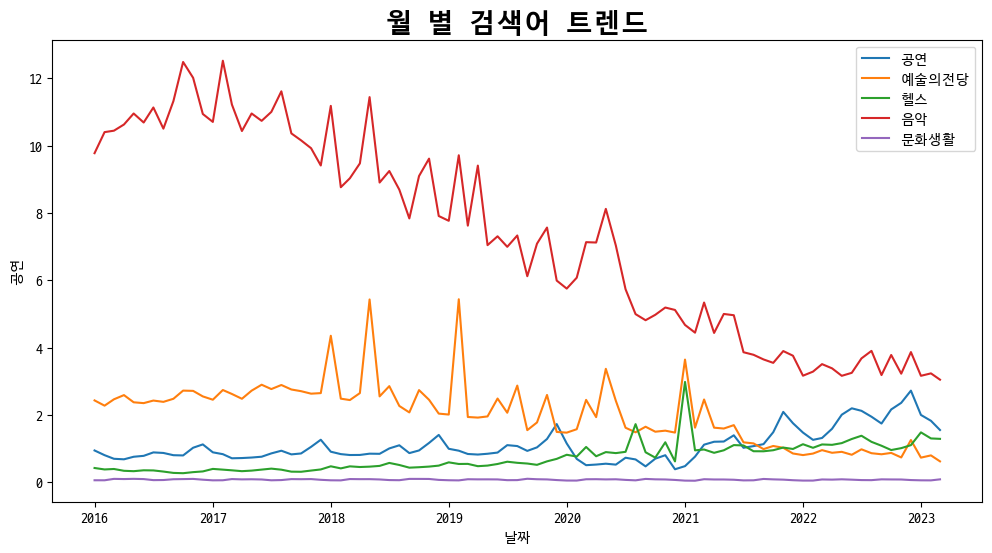

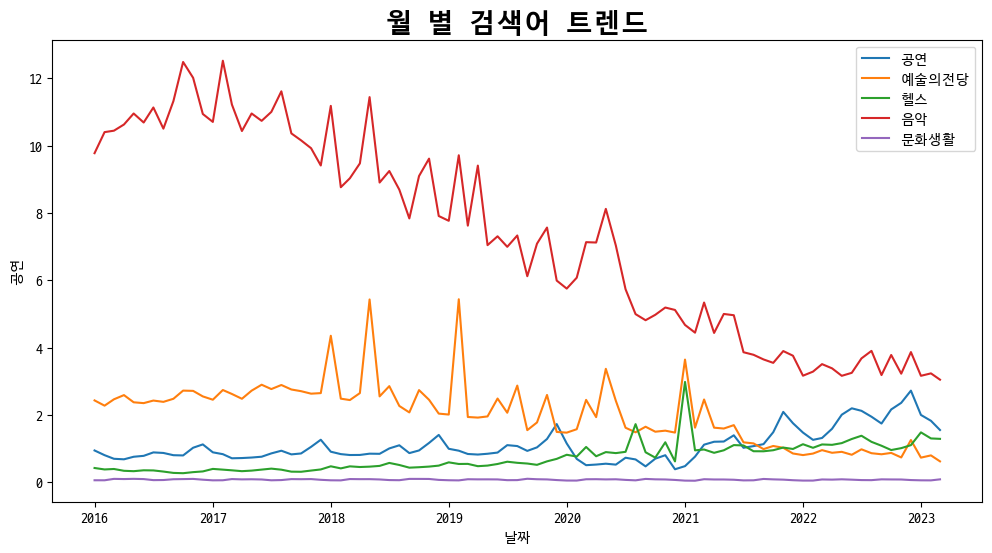

In [49]:
# 월별 검색어 트렌드 꺾은선 그래프인데
# 일단 예시입니다 '3'
naver.plot_monthly_trend()

In [50]:
import random

In [51]:
offline.head(3)

,지역,가맹점명,분류,주소
0,전북,한옥마을 아트홀,공연,전북 전주시 완산구 경기전길 42 (경원동2가)
1,전북,경원장여관,숙박,전북 전주시 완산구 경기전길 8-5
2,전북,사단법인교동아트,미술,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)


In [52]:
#편한 인덱싱을 위해 '분류'를 인덱스로 설정
offline2 = offline.set_index('분류')
offline2.head(3)

,지역,가맹점명,주소
분류,,,
공연,전북,한옥마을 아트홀,전북 전주시 완산구 경기전길 42 (경원동2가)
숙박,전북,경원장여관,전북 전주시 완산구 경기전길 8-5
미술,전북,사단법인교동아트,전북 전주시 완산구 경기전길 89 교동아트미술관 (풍남동3가)


In [53]:
#'분류'의 종류
oi = list(offline2.index.unique())
oi

['공연',
 '숙박',
 '미술',
 '도서',
 '여행사',
 '교통수단',
 '문화체험',
 '관광지',
 '음악',
 '영상',
 '체육시설',
 '체육용품',
 '스포츠관람']

In [54]:
offline2.loc['체육시설']
offline2.loc[ oi[10] ]

,지역,가맹점명,주소
분류,,,
체육시설,대구,대구사격장(대구시설공단),대구 북구 문주길 170
체육시설,경기,의정부 스포츠센터,"경기 의정부시 장곡로 101, 의정부스포츠센터"
체육시설,경기,의정부시설관리공단(빙상장),경기 의정부시 체육로136
체육시설,충남,위너당구클럽,충남 천안시 서북구 불당33길 26 우리타워8층
체육시설,대전,원동스포츠,대전 서구 유등로633(용문동)
...,...,...,...
체육시설,서울,두산골프아카데미,서울특별시 관악구 봉천로 391 두산아파트 A상가 지하 1층
체육시설,서울,월계구민체육센터,서울특별시 노원구 월계로 298 월계구민체육센터
체육시설,경북,S휘트니스,경상북도 안동시 한화3길 57


In [55]:
offline2.iloc[0]

지역                              전북 
가맹점명                       한옥마을 아트홀
주소      전북 전주시 완산구 경기전길 42 (경원동2가) 
Name: 공연, dtype: object

In [56]:
random.sample(list(offline2.loc[offline2.index.unique()[0]]['가맹점명']),20)

['주식회사 조은라인',
 '아양아트센터((재)동구문화재단)',
 '수봉문화회관(한국예술문화단체 총연합회)',
 'SALOME(주식회사 문화예술기획살로메)',
 '정읍사예술회관(정읍시청)',
 '주식회사힐투어',
 '창조예술공간더율',
 '(주)가톨릭다이제스트',
 '㈜키즈에듀',
 '스피릿앙상블',
 '드림메이커엔터테인먼트리미티드(영업소)',
 '극단허리',
 '극단 도깨비',
 '원앤원엔터테인먼트',
 '피터폴앤메리',
 '하모니아',
 '액터스테이지 담쟁이',
 '엔티켓((주)엔엔터테인먼트)',
 '조은소리',
 '㈜죠이커뮤니케이션']

In [57]:
random.seed(0)

keyword_group_set = {
    'keyword_group_1': {'groupName': oi[0], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[0]]['가맹점명']),20)},
    'keyword_group_2': {'groupName': oi[1], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[1]]['가맹점명']),20)},
    'keyword_group_3': {'groupName': oi[2], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[2]]['가맹점명']),20)},
    'keyword_group_4': {'groupName': oi[3], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[3]]['가맹점명']),20)},
    'keyword_group_5': {'groupName': oi[4], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[4]]['가맹점명']),20)},
}

In [58]:
naver = naverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

for key in keyword_group_set:
    naver.add_keyword_groups(keyword_group_set[key])
    
df1 = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)
df1

>>> Num of KeywordGroups: 1
>>> Num of KeywordGroups: 2
>>> Num of KeywordGroups: 3
>>> Num of KeywordGroups: 4
>>> Num of KeywordGroups: 5


,날짜,공연,숙박,미술,도서,여행사
0,2016-01-01,3.19439,1.24693,1.06479,4.05604,NaN
1,2016-01-02,2.95621,1.25394,1.01576,7.25744,NaN
2,2016-01-03,2.69001,0.90367,1.21190,5.65323,NaN
3,2016-01-04,4.45534,0.87565,0.86865,7.17338,NaN
4,2016-01-05,3.67775,0.90367,1.11383,5.52014,NaN
...,...,...,...,...,...,...
2628,2023-03-13,4.56742,5.54816,0.84063,2.83712,0.08406
2629,2023-03-14,4.19614,6.09457,0.80560,2.63397,NaN
2630,2023-03-15,4.16112,5.85639,0.72154,2.30472,NaN
2631,2023-03-16,4.81961,5.72329,0.93169,2.06654,NaN


In [66]:
random.seed(0)

keyword_group_set = {
    'keyword_group_1': {'groupName': oi[0], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[0]]['가맹점명']),20)},
    'keyword_group_2': {'groupName': oi[5], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[5]]['가맹점명']),20)},
    'keyword_group_3': {'groupName': oi[6], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[6]]['가맹점명']),20)},
    'keyword_group_4': {'groupName': oi[7], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[7]]['가맹점명']),20)},
    'keyword_group_5': {'groupName': oi[8], 'keywords': random.sample(list(offline2.loc[offline2.index.unique()[8]]['가맹점명']),20)},
}

In [67]:
naver = naverDataLabOpenAPI(client_id=client_id, client_secret=client_secret)

for key in keyword_group_set:
    naver.add_keyword_groups(keyword_group_set[key])
    
df2 = naver.get_data(startDate, endDate, timeUnit, device, ages, gender)
df2

>>> Num of KeywordGroups: 1
>>> Num of KeywordGroups: 2
>>> Num of KeywordGroups: 3
>>> Num of KeywordGroups: 4
>>> Num of KeywordGroups: 5


,날짜,공연,교통수단,문화체험,관광지,음악
0,2016-01-01,0.74310,8.60113,0.14666,18.88892,0.69095
1,2016-01-02,0.68769,7.91995,0.21510,14.81487,0.66488
2,2016-01-03,0.62577,8.04054,0.19066,10.55178,0.57362
3,2016-01-04,1.03643,6.37507,0.25096,9.86734,0.78058
4,2016-01-05,0.85555,5.88781,0.24444,9.34587,0.59318
...,...,...,...,...,...,...
2628,2023-03-13,1.06251,2.23420,0.35688,13.93651,0.72844
2629,2023-03-14,0.97614,2.07613,0.37155,14.12554,0.73821
2630,2023-03-15,0.96799,2.09732,0.37807,13.92510,0.70562
2631,2023-03-16,1.12117,2.20161,0.42044,16.14627,0.68932


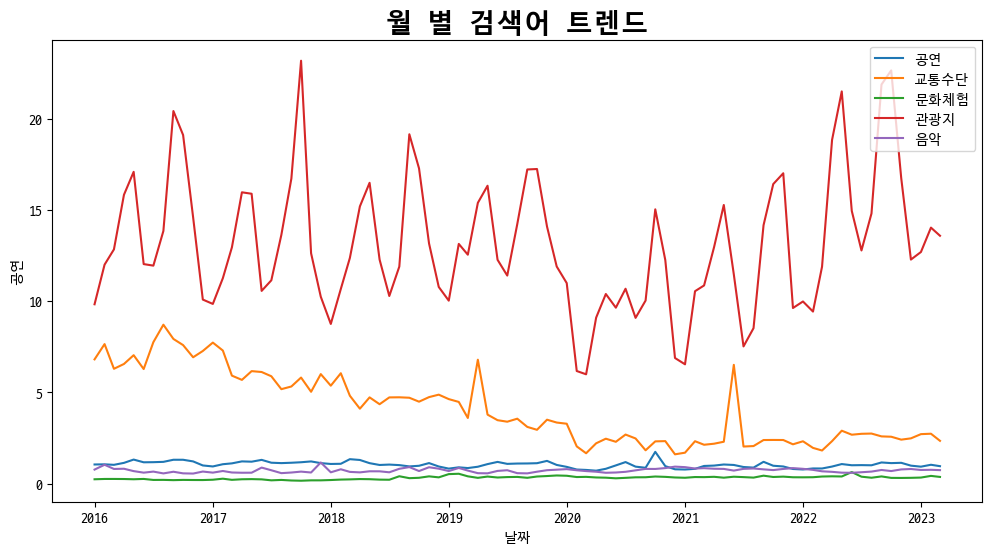

In [76]:
naver.plot_monthly_trend()
plt.show()

In [61]:
df.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_10452\3698961737.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


공연       1.095162
예술의전당    2.062662
헬스       0.727284
음악       7.330685
문화생활     0.077365
dtype: float64

In [62]:
random.seed(0)
random.sample(list(offline2.loc[offline2.index.unique()[0]]['가맹점명']),20)

['북구문화예술회관(울산광역시북구청)',
 '고스트컴퍼니(공연기획사)',
 '정밀기획',
 '남도소리울림터(재단법인 전남문화예술재단)',
 '(사)예술나눔',
 '주식회사 퓨전국악단 구름',
 '극단 진일보',
 '쑈하우',
 '광산문화예술회관',
 '소극장 연극바보들(사회적협동조합 무하)',
 '(주)가톨릭다이제스트',
 '사단법인 한국문화예술산업진흥회 서울지회',
 '시온아트홀(아트컴퍼니 행복자)',
 '푸른달 극장',
 '아리수',
 'The theater(더 씨어터)',
 '티엘아이아트센터(㈜조슈아)',
 '극단 구리거울(소금창고)',
 '군산예술의전당',
 '포시즌컴퍼니']

In [63]:
offline2.index.unique()[0]

'공연'